## Environment and Directory Setup
This cell sets the working directory for the notebook.

In [1]:
# This cell imports all necessary libraries and modules for running the model and visualizations.
import os
os.chdir('../')
%pwd
from src.constants import *
from src.utils.utils import *
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from src.utils.grad_cam_pred import GradCAMVisualizer

2023-11-20 11:16:57.195726: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-20 11:16:57.216561: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-20 11:16:57.216581: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-20 11:16:57.216596: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-20 11:16:57.221172: I tensorflow/core/platform/cpu_feature_g

In [2]:
# Set the device to CPU
tf.config.set_visible_devices([], 'GPU')

2023-11-20 11:16:58.793508: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 11:16:58.796775: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-20 11:16:58.796889: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

## Model Loading
This cell loads the pre-trained model along with its modals and labels.

In [3]:
# Load the trained model from the given path, as well as the modalities and labels used for training.
# Load your trained model, modals, and labels
MODEL_PATH = os.path.join(SAVED_MODEL_DIR, 'model.h5')
model = tf.keras.models.load_model(MODEL_PATH)
modals = MODALS
labels = LABELS


## GradCAM Initialization
This cell initializes the GradCAMVisualizer with the loaded model to visualize model predictions.

In [4]:
# Initialize the GradCAM visualizer with the specified layer for visual explanations of model predictions.
# Initialize GradCAMVisualizer
visualizer = GradCAMVisualizer(model, 'activation_951', modals, labels)

## Data Loading for Testing
This cell loads the test data from a pickle file and converts it into a format suitable for testing.

In [5]:
# Load test data from a pickle file into a pandas DataFrame and then convert it to a numpy array for model input.
# Load test data from pickle file
test_df = load_dataframe_from_pickle(os.path.join(SAVED_DATASET_DIR, "test_data_LOSegO_4_1_1Hz.pkl"))
test_data, test_labels = dataframe_to_array(test_df[0:1])
normalized_test_data = preprocess_test_data(test_data, TRAIN_DATA_MEAN, TRAIN_DATA_STD)

In [6]:
predictions = model.predict(normalized_test_data)
predicted_label = np.argmax(predictions, axis=1)
class_labels = LABELS_DICT
print(f'Predicted label: {class_labels[predicted_label[0]]}')

1/1 [==============================] - 0s 117ms/step
Predicted label: Relax


In [7]:
pred_dict = {'Data' : [test_data.squeeze()], 'Label' : predicted_label[0], 'Label_ori' : class_labels[predicted_label[0]]}
pred_df = pd.DataFrame.from_dict(pred_dict)
pred_df

,Data,Label,Label_ori
0,"[[75.0, 96.0, 32.0, 0.087, 0.23, -1.04, -0.11]...",0,Relax


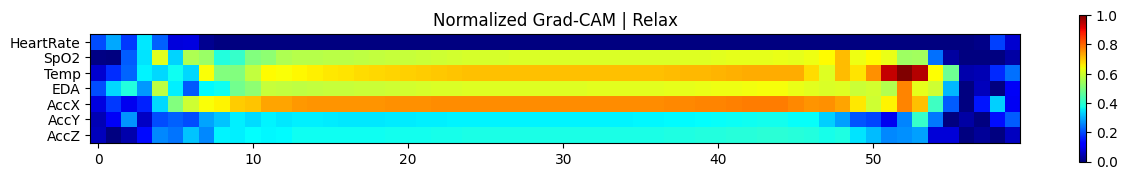

In [8]:


# Plot Grad-CAM for all modalities
norm = visualizer.vis_grad_cam_all_modal(pred_df)


In [9]:
# Plot Grad-CAM for the input segment
img = visualizer.vis_grad_cam_one_modal(pred_df)